# Predicting Conversions

This notebook is for generating predictions on the desired time frame, age group, target group, topic and dollar amount spent on marketing campaign. 

## Importing Packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
#import modelplotpy as mp
plt.style.use("ggplot")
import pandas as pd
import numpy as np
#import warnings 
#warnings.fiterwarnings('ignore')

import pickle
from datetime import datetime, date, time, timedelta
from dateutil import relativedelta

from scipy.stats import gaussian_kde
from hashlib import md5

import os 
import sys
import re
import io
import requests
import zipfile
import warnings
warnings.filterwarnings('ignore')
#import pystan 
#import matplotlib as plt

import seaborn as sns
import matplotlib

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.base import clone 
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score
from itertools import product

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

from __future__ import print_function

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.base import BaseEstimator, TransformerMixin

#from sklearn_features.transformers import DataFrameSelector
from sklearn.preprocessing import Imputer
# from sklearn.preprocessing import CategoricalEncoder
from sklearn.pipeline import FeatureUnion 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [3]:
# imblearn has a problem by installation! First pip install is needed. Then the kernel
# must be restarted then imblearn needs to be imported.

!pip install imblearn

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import imblearn

Using TensorFlow backend.


In [5]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.metrics import balanced_accuracy_score
# from imblearn.datasets import fetch_datasets
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import hamming_loss
from sklearn import metrics


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# from imblearn.ensemble import BalancedBaggingClassifier
# from imblearn.ensemble import BalancedRandomForestClassifier
# from imblearn.ensemble import EasyEnsembleClassifier
# from imblearn.ensemble import RUSBoostClassifier
# from imblearn.metrics import geometric_mean_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel


from imblearn.over_sampling import SMOTE
# from imblearn.datasets import make_imbalance
# from imblearn.under_sampling import NearMiss
# from imblearn.pipeline import make_pipeline
# from imblearn.metrics import classification_report_imbalanced
# from collections import Counter
# from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
# from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
# from imblearn.ensemble import BalanceCascade, EasyEnsemble

import sagemaker
from sagemaker.tensorflow import TensorFlow

import tensorflow # Imports tensorflow
import keras # Imports keras

from keras.models import Sequential #Sequential Models
from keras.layers import Dense #Dense Fully Connected Layer Type
from keras.optimizers import SGD #Stochastic Gradient Descent Optimizer
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.layers import Dropout

In [6]:
!pip install graphviz

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
!pip install pydot

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
!pip install pydotplus

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
from sklearn import tree
import graphviz
from IPython.display import Image
import io
from sklearn.externals.six import StringIO  
import pydot
import pydotplus
from graphviz import Digraph

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [10]:
!pip install pymc3

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
import pymc3 as pm

In [12]:
!conda config --add channels conda-forge

## Uploading the Data

In [13]:
# Uploading the Facebook Ads Manager from S3 Bucket:
import boto3
from sagemaker import get_execution_role

role = get_execution_role()
bucket='facebookconversionrates/fb_raw_data'
data_key = 'fbadset.xlsx'
data_location = 's3://{}/{}'.format(bucket, data_key)

df = pd.read_excel(data_location)
xls = pd.ExcelFile

df = pd.read_excel(data_location, 
                   sheet_name=None, # instead of entering all the sheet names, sheet_name=None indicates all sheets to be uploaded
                   skiprows=None)

#convert dict to df to concat all sheets
dfs = []
for dfname in df.keys():
    temp_df = df[dfname]
    temp_df['Session'] = dfname
    dfs.append(temp_df)
    
df = pd.concat(dfs)

In [14]:
df.columns

Index(['Ad Account ID', 'Ad Account Name', 'Reporting starts',
       'Reporting ends', 'Ad set name', 'Age', 'Ad set delivery', 'Bid',
       'Bid Type', 'Ad set budget', 'Ad set budget type',
       'Last significant edit', 'Results', 'Result indicator', 'Reach',
       'Impressions', 'Cost per results', 'Amount spent (USD)', 'Ends',
       'Starts', 'Link clicks', 'Website purchases', 'Leads (form)',
       'Campaign name', 'Campaign ID', 'Lead - Page Contains thank-you',
       'Lead Submission', 'Ad set ID', 'Landing page views', 'Session'],
      dtype='object')

In [15]:
len(df)

105971

In [16]:
#remove space and concat _column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('_-_', '_')

In [17]:
df.sort_values(by='reporting_starts',ascending=False, inplace = True)

In [18]:
max(df['reporting_starts'])

Timestamp('2019-09-03 00:00:00')

In [19]:
min(df['reporting_starts'])

Timestamp('2018-01-01 00:00:00')

In [20]:
df.drop_duplicates(keep=False,inplace=True)

In [21]:
df.head()

,ad_account_id,ad_account_name,reporting_starts,reporting_ends,ad_set_name,age,ad_set_delivery,bid,bid_type,ad_set_budget,...,link_clicks,website_purchases,leads_(form),campaign_name,campaign_id,lead_page_contains_thank-you,lead_submission,ad_set_id,landing_page_views,session
7797,971415906232505,Matterport,2019-09-03,2019-09-03,ES - PS - Evergreen - All Lists - 5.1,55-64,active,0,ABSOLUTE_OCPM,25.0,...,NaN,NaN,NaN,Facebook - EMEA - ES - PS - Lead Submissions,6074860433239,NaN,NaN,6124979913439,NaN,sheet10
7786,971415906232505,Matterport,2019-09-03,2019-09-03,UK - PS - Evergreen - Video & Website Remarket...,25-34,active,0,ABSOLUTE_OCPM,400.0,...,52.0,NaN,NaN,Facebook - EMEA - UK - PS - Lead Submissions,6058738984839,1.0,NaN,6127430097839,37.0,sheet10
7776,971415906232505,Matterport,2019-09-03,2019-09-03,UK - PS - Evergreen - SQL LAL - 5.23,25-34,active,0,ABSOLUTE_OCPM,50.0,...,7.0,NaN,NaN,Facebook - EMEA - UK - PS - Lead Submissions,6058738984839,NaN,NaN,6127432339039,4.0,sheet10
7777,971415906232505,Matterport,2019-09-03,2019-09-03,UK - PS - Evergreen - SQL LAL - 5.23,18-24,active,0,ABSOLUTE_OCPM,50.0,...,NaN,NaN,NaN,Facebook - EMEA - UK - PS - Lead Submissions,6058738984839,NaN,NaN,6127432339039,NaN,sheet10
7778,971415906232505,Matterport,2019-09-03,2019-09-03,UK - PS - Evergreen - Camera Sales LAL - 5.23,55-64,active,0,ABSOLUTE_OCPM,50.0,...,NaN,NaN,NaN,Facebook - EMEA - UK - PS - Lead Submissions,6058738984839,NaN,NaN,6127431430239,NaN,sheet10


In [22]:
df['ends'] = df['ends'].replace('Sürekli', 'Ongoing')

In [23]:
df['ends'].value_counts()

Ongoing                102778
2018-09-30 00:00:00      1629
43706                     254
2019-07-29 00:00:00       230
43719                     140
2018-03-23 00:00:00       120
2018-02-28 00:00:00       112
2018-04-30 00:00:00       104
2019-07-23 00:00:00        96
2018-09-23 00:00:00        85
2019-05-27 00:00:00        84
2018-10-24 00:00:00        60
2018-07-10 00:00:00        56
2019-05-15 00:00:00        52
2018-11-26 00:00:00        48
2019-06-23 00:00:00        35
2018-09-20 00:00:00        32
2018-07-09 00:00:00        28
2018-10-23 00:00:00        28
Name: ends, dtype: int64

In [24]:
fb=df.copy()

In [25]:
fb.columns

Index(['ad_account_id', 'ad_account_name', 'reporting_starts',
       'reporting_ends', 'ad_set_name', 'age', 'ad_set_delivery', 'bid',
       'bid_type', 'ad_set_budget', 'ad_set_budget_type',
       'last_significant_edit', 'results', 'result_indicator', 'reach',
       'impressions', 'cost_per_results', 'amount_spent_(usd)', 'ends',
       'starts', 'link_clicks', 'website_purchases', 'leads_(form)',
       'campaign_name', 'campaign_id', 'lead_page_contains_thank-you',
       'lead_submission', 'ad_set_id', 'landing_page_views', 'session'],
      dtype='object')

In [26]:
fb['day_of_week']=fb['reporting_starts'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
fb['day_of_week'] = fb['day_of_week'].apply(lambda x: days[x])

In [27]:
fb['year'],fb['month'],fb['week_num'] = fb['reporting_starts'].dt.year, fb['reporting_starts'].dt.month, fb['reporting_starts'].dt.week

In [28]:
#return_inverse : bool, optional
#If True, also return the indices of the unique array 
#(for the specified axis, if provided) that can be used to reconstruct ar.
def unique_val_count(a):
    unique, inverse = np.unique(a, return_inverse=True)
    count = np.zeros(len(unique), np.int)
    np.add.at(count, inverse, 1)
    return np.vstack((unique, count)).T

In [29]:
fb['campaign_name']=fb.campaign_name.str.replace('Facebook','').str.strip().str.replace(' ','')

In [30]:
fb['campaign_name']=fb['campaign_name'].str.replace(' ',
'').str.strip().apply(lambda x : x[1:] if x.startswith("-") else x)

In [31]:
fb['location'] = fb.campaign_name.str.split('-').str[0]
fb['topic'] = fb.campaign_name.str.split('-').str[1]
fb['type'] = fb.campaign_name.str.split('-').str[2]

In [32]:
#fb[['location','topic','type']]=fb['campaign_name'].str.extract('(?P<location>[\s\S]+) - (?P<topic>[\s\S]+) - (?P<type>[\s\S]+)', expand=True)

In [33]:
# Filtering out only the conversions in the US
np.unique(fb.ad_set_name)
#fb.to_csv('ads.csv',index=False)

array(['AU - AU Site Retargeting - LAL', 'AU - ENT - Self Employed - 2.1',
       'AU - ENT - Self Employed - 2.15',
       'AU - ENT - Self Employed - 3.15',
       'AU - ENT - Self Employed - 3.7',
       'AU - ENT - Self Employed / Drivers',
       'AU - RRE - All Lists - LAL- 1.19',
       'AU - RRE - All Lists - LAL- 2.15',
       'AU - RRE - All Lists - LAL- 3.15',
       'AU - RRE - All Lists - LAL- 3.7',
       'AU - RRE - All Lists - LAL- 4.26',
       'AU - RRE - All Lists - LAL- 4.9',
       'AU - RRE - Website Remarketing & LAL - 5.9',
       'AU - RRE - Website Remarketing - 4.17',
       'CA - CA REMAX Agents - LAL', 'CA - CA REMAX Agents - LAL - 2.26',
       'CA - CA REMAX Agents - LAL - 3.29',
       'CA - CA Website Retargeting - LAL',
       'CA - ENT - Self Employed / Drivers',
       'CA - ENT - Self Employed / Drivers - 1.30',
       'CA - ENT - Self Employed / Drivers - 2.15',
       'CA - ENT - Self Employed / Drivers - 3.1', 'CA - GEN - MQL - LAL',
       'CA -

In [34]:
fb['target'] = fb.ad_set_name.str.split('-').str[1]
fb['target_sub'] = fb.ad_set_name.str.split('-').str[2]
fb['version']=fb.ad_set_name.str.extract('-([^-]*)$')
#fb['version']=fb.ad_set_name.str.split('(\d+)').astype(int)

In [35]:
fb['target']=fb['target'].str.replace("AEC|CRE|Cloud|Event:Webinar|GEN|INS|MF|MSP|PS|RRE|TH",'').str.replace('-',"")
fb['target']=fb['target'].str.replace("AU|BoostedPost|CA|DE|EMEA|ES|FR|IT|MX|PL|SE|UK|US|ZA",'').str.replace('-',"")
fb['target']=fb['target'].str.replace("AU|BoostedPost|CA|DE|EMEA|ES|FR|IT|MX|PL|SE|UK|US|ZA|LAL|Latin America",'').str.replace('-',"")


In [36]:
fb['target_grouped'] = fb['target'].astype(str) + fb['target_sub'].astype(str)

In [37]:
unique_val_count(fb.target_grouped.astype(str)).tolist()

[['    All Lists ', 558],
 ['    Brokers LAL ', 113],
 ['    PS ', 104],
 ['    Submitted Lead Form LAL ', 148],
 ['    Website Remarketing ', 132],
 ['   2% ', 230],
 ['   Agents & Brokers ', 1625],
 ['   All Lists ', 15856],
 ['   All Lists  LAL ', 181],
 ['   All Remarketing ', 116],
 ['   Architects ', 1639],
 ['   Awareness', 232],
 ['   Awareness ', 1832],
 ['   B2B TH + Online Advertisiing ', 80],
 ['   B2B TH + Online Advertising ', 360],
 ['   Brokers ', 223],
 ['   Camera Sale LAL ', 110],
 ['   Camera Sales & Buy Site LAL ', 605],
 ['   Case Study ', 51],
 ['   Claims Adjusters Job Titles ', 48],
 ['   Construction ', 1722],
 ['   Construction Webinar Event ', 12],
 ['   DE/ROW ', 689],
 ['   DQ Cost ', 356],
 ['   DQ Cost Remarketing & LAL ', 16],
 ['   DQ Cost Remarketing LAL ', 4],
 ['   DQ Remarketing & LAL ', 20],
 ['   David Troyer ', 268],
 ['   December Sale ', 340],
 ['   EBook ', 108],
 ['   ENGL ', 1017],
 ['   ENT Photography Entrepreneur ', 708],
 ['   Engineers

In [38]:
fb.columns

Index(['ad_account_id', 'ad_account_name', 'reporting_starts',
       'reporting_ends', 'ad_set_name', 'age', 'ad_set_delivery', 'bid',
       'bid_type', 'ad_set_budget', 'ad_set_budget_type',
       'last_significant_edit', 'results', 'result_indicator', 'reach',
       'impressions', 'cost_per_results', 'amount_spent_(usd)', 'ends',
       'starts', 'link_clicks', 'website_purchases', 'leads_(form)',
       'campaign_name', 'campaign_id', 'lead_page_contains_thank-you',
       'lead_submission', 'ad_set_id', 'landing_page_views', 'session',
       'day_of_week', 'year', 'month', 'week_num', 'location', 'topic', 'type',
       'target', 'target_sub', 'version', 'target_grouped'],
      dtype='object')

In [39]:
import re
fb['target_grouped'].replace(regex=True, inplace=True, to_replace=r'[^A-Za-z0-9]+',
value='')

In [40]:
fb.target_grouped=fb.target_grouped.str.strip().str.lower().str.replace(' ', '')

In [41]:
fb['target_grouped']=fb.target_grouped.str.replace('openedleadformslal','openedleadformlal')

In [42]:
fb['target_grouped']=fb.target_grouped.str.replace('MQLSQLPS','MQLSQL')

In [43]:
fb[['target_grouped']].head()

,target_grouped
7797,evergreen
7786,evergreen
7776,evergreen
7777,evergreen
7778,evergreen


In [44]:
fb['topic']=fb.topic.str.replace('Clould3.0','Cloud3.0')
fb['topic']=fb.topic.str.replace('CarribeanIslands','CaribbeanIslands')
fb['topic']=fb.topic.str.replace('AECArchitects','AEC')
fb['topic']=fb.topic.str.replace('CAWebsiteRetargeting','RetargetingWebsite')
fb['topic']=fb.topic.str.replace('CAWebsiteRetargeting','RetargetingWebsite')
fb['topic']=fb.topic.str.replace('WebsiteRetargeting','RetargetingWebsite')
fb['target']=fb.target.str.replace('Re','Re-Engagement')
fb['target']=fb.target.str.replace('&','')


In [45]:
#fb.drop('version',inplace=True,axis=1)

In [46]:
age=['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

In [47]:
fb=fb.query('age in @age')

In [48]:
#fill all blanks with novalue if the column dtype is object
fb = fb.apply(lambda x: x.fillna(0.0) if x.dtype.kind in 'biufc' else x.fillna('novalue'))

In [49]:
fb=fb.fillna(0.0)      #if the blanks are nan will need this line first

In [50]:
fb.columns

Index(['ad_account_id', 'ad_account_name', 'reporting_starts',
       'reporting_ends', 'ad_set_name', 'age', 'ad_set_delivery', 'bid',
       'bid_type', 'ad_set_budget', 'ad_set_budget_type',
       'last_significant_edit', 'results', 'result_indicator', 'reach',
       'impressions', 'cost_per_results', 'amount_spent_(usd)', 'ends',
       'starts', 'link_clicks', 'website_purchases', 'leads_(form)',
       'campaign_name', 'campaign_id', 'lead_page_contains_thank-you',
       'lead_submission', 'ad_set_id', 'landing_page_views', 'session',
       'day_of_week', 'year', 'month', 'week_num', 'location', 'topic', 'type',
       'target', 'target_sub', 'version', 'target_grouped'],
      dtype='object')

In [51]:
#fb_us=fb[fb['location']=='US']

In [52]:
fb[(fb['location']=='US')&(fb['year']==2019) &(fb['topic']=='RRE')
   ].groupby(['campaign_name','ad_set_name','target_grouped']).size()

campaign_name           ad_set_name                                            target_grouped        
US-RRE-LeadSubmissions  US - RRE - Agents & Brokers - LAL - 10.17              agentsbrokers             128
                        US - RRE - Camera Sale LAL - Evergreen - 4.24          camerasalelal             108
                        US - RRE - Evergreen - Agents & Brokers - LAL - 4.10   evergreen                 256
                        US - RRE - Evergreen - Agents & Brokers - LAL - 4.19   evergreen                 128
                        US - RRE - Evergreen - Employers - 7.31                evergreen                 175
                        US - RRE - Evergreen - Job Titles - 7.31               evergreen                 174
                        US - RRE - Evergreen - Video Remarketing & LAL - 4.18  evergreen                 282
                        US - RRE - Evergreen - Video Remarketing & LAL - 4.4   evergreen                 108
                        US

In [53]:
fb['conversion']= fb[['lead_page_contains_thank-you']].astype(float)

In [54]:
fb.conversion

7797      0.0
7786      1.0
7776      0.0
7777      0.0
7778      0.0
7779      1.0
7780      0.0
7781      1.0
7782      0.0
7783      0.0
7784      4.0
7785      2.0
7787      0.0
7774      0.0
7788      0.0
7789      0.0
7790      0.0
7791      0.0
7792      3.0
7793     20.0
7794     18.0
7795      6.0
7796      5.0
7798      1.0
7775      2.0
7773      1.0
7747      0.0
7759      1.0
7749      0.0
7750      0.0
         ... 
17774     0.0
17763     0.0
17775     1.0
17776     0.0
17777     0.0
17778     0.0
17779     1.0
17780     0.0
17781     7.0
17764     2.0
17762     0.0
17743     0.0
17752     0.0
17745     0.0
17746     0.0
17747     0.0
17748     0.0
17749     2.0
17750     2.0
17751     1.0
17753     2.0
17761     0.0
17754     0.0
17755     0.0
17756     5.0
17757     1.0
17758     3.0
17759     1.0
17760     4.0
17744     0.0
Name: conversion, Length: 105885, dtype: float64

In [55]:

def conversion_categ(df):
    if ((df.conversion>=0) & (df.conversion<=2)):
        return "btw 0 and 2 conversions"
    elif ((df.conversion>=3) & (df.conversion<=6)): 
        return "btw 3 and 6 conversions"
    elif ((df.conversion>=7) & (df.conversion<=12)): 
        return "btw 7 and 12 conversions"
    else:
        return 'more than 12 conversions'
    
          

In [56]:
fb['labels']=fb.apply(conversion_categ,axis=1)

In [57]:
def missing_values(df):
        mis = df.isnull().sum()
        mis_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis, mis_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        print ("df has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [58]:
missing_values(fb)

df has 43 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [59]:
np.unique(fb.age,return_counts=True)

(array(['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], dtype=object),
 array([ 5661, 24286, 24293, 24289, 23058,  4298]))

In [60]:

#repordering the columns
fb=fb[['ad_account_id', 'ad_account_name', 'reporting_starts',
       'reporting_ends', 'ad_set_name', 'age', 'ad_set_delivery', 'bid',
       'bid_type', 'ad_set_budget', 'ad_set_budget_type','day_of_week', 'year', 'month', 
       'week_num', 'location', 'topic', 'type',
       'target', 'target_sub', 'version', 'target_grouped',
       'last_significant_edit', 'results', 'result_indicator', 'reach',
       'impressions', 'cost_per_results', 'amount_spent_(usd)', 'ends',
       'starts', 'link_clicks', 'website_purchases', 'leads_(form)',
       'campaign_name', 'campaign_id', 'lead_page_contains_thank-you',
       'lead_submission', 'ad_set_id', 'landing_page_views', 'session',
        'conversion',
       'labels']]

In [61]:
#fb_ls_us=fb.query('location in @location and type in @types and topic in @topic')

In [62]:
def unique_val_count(a):
    unique, inverse = np.unique(a, return_inverse=True)
    count = np.zeros(len(unique), np.int)
    np.add.at(count, inverse, 1)
    return np.vstack((unique, count)).T

In [63]:
fb.head()

,ad_account_id,ad_account_name,reporting_starts,reporting_ends,ad_set_name,age,ad_set_delivery,bid,bid_type,ad_set_budget,...,leads_(form),campaign_name,campaign_id,lead_page_contains_thank-you,lead_submission,ad_set_id,landing_page_views,session,conversion,labels
7797,971415906232505,Matterport,2019-09-03,2019-09-03,ES - PS - Evergreen - All Lists - 5.1,55-64,active,0,ABSOLUTE_OCPM,25.0,...,0.0,EMEA-ES-PS-LeadSubmissions,6074860433239,0.0,0.0,6124979913439,0.0,sheet10,0.0,btw 0 and 2 conversions
7786,971415906232505,Matterport,2019-09-03,2019-09-03,UK - PS - Evergreen - Video & Website Remarket...,25-34,active,0,ABSOLUTE_OCPM,400.0,...,0.0,EMEA-UK-PS-LeadSubmissions,6058738984839,1.0,0.0,6127430097839,37.0,sheet10,1.0,btw 0 and 2 conversions
7776,971415906232505,Matterport,2019-09-03,2019-09-03,UK - PS - Evergreen - SQL LAL - 5.23,25-34,active,0,ABSOLUTE_OCPM,50.0,...,0.0,EMEA-UK-PS-LeadSubmissions,6058738984839,0.0,0.0,6127432339039,4.0,sheet10,0.0,btw 0 and 2 conversions
7777,971415906232505,Matterport,2019-09-03,2019-09-03,UK - PS - Evergreen - SQL LAL - 5.23,18-24,active,0,ABSOLUTE_OCPM,50.0,...,0.0,EMEA-UK-PS-LeadSubmissions,6058738984839,0.0,0.0,6127432339039,0.0,sheet10,0.0,btw 0 and 2 conversions
7778,971415906232505,Matterport,2019-09-03,2019-09-03,UK - PS - Evergreen - Camera Sales LAL - 5.23,55-64,active,0,ABSOLUTE_OCPM,50.0,...,0.0,EMEA-UK-PS-LeadSubmissions,6058738984839,0.0,0.0,6127431430239,0.0,sheet10,0.0,btw 0 and 2 conversions


In [64]:
fb['location'].value_counts()

US             45508
EMEA           31918
UK              7396
MX              5941
DE              5630
FR              3439
CA              2095
AU              1703
ZA              1594
ES               372
IT               112
BoostedPost      112
SE                65
Name: location, dtype: int64

In [65]:
fb.drop_duplicates(inplace=True)
fb.reset_index(drop=True, inplace=True)

In [66]:
loc_lst = []

for i in range(len(fb)):
    if fb['location'][i] == 'EMEA':
        if (fb['topic'][i] == 'PS') | (fb['topic'][i] == 'RRE'):
            loc_lst.append('EMEA')
        else:
            loc_lst.append(fb['topic'][i])
    else:
        loc_lst.append(fb['location'][i])
        
pd.Series(loc_lst).value_counts()

US             45508
UK             13573
FR             10743
DE              6873
ES              6649
MX              5941
EMEA            5321
ZA              3939
IT              2399
CA              2095
AU              1703
PL               964
BoostedPost      112
SE                65
dtype: int64

In [67]:
fb['location1'] = loc_lst

In [68]:
topic_lst = []

for i in range(len(fb)):
    if fb['location'][i] == 'EMEA':
        if (fb['topic'][i] != 'PS') & (fb['topic'][i] != 'RRE'):
            topic_lst.append(fb['type'][i])
        else:
            topic_lst.append(fb['topic'][i])
    else:
        topic_lst.append(fb['topic'][i])
        
pd.Series(topic_lst).value_counts()

RRE              54284
PS               35472
AEC               3843
TH                2125
INS               2107
MSP               1835
Cloud             1624
CRE               1388
MF                1304
Cloud3.0          1064
GEN                637
Event:Webinar      112
8.21Meetup          90
dtype: int64

In [69]:
fb['topic1'] = topic_lst

In [70]:
fb.drop(columns = ['location','topic'], inplace=True)
fb = fb.rename(columns={'location1':'location',
                      'topic1':'topic'})

In [71]:
fb.to_csv('/home/ec2-user/SageMaker/fb_conversion_predictions_2019-06-27/Data/fb_prepo.csv',index=False)

In [72]:
bucket='facebookconversionrates' # bucket name
data_key = 'preprocessed/fb_prepro.csv' # name of the csv file that will be created
csv_buffer = StringIO()
fb.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, data_key).put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': '469557806AAE9265',
  'HostId': 'ybhz/S/MDFIvxwk225CQQShJN1dHtCQqFAanFCUqpNA/xHgNONhi4sE78EGORAqgv+3kSpXP9/E=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'ybhz/S/MDFIvxwk225CQQShJN1dHtCQqFAanFCUqpNA/xHgNONhi4sE78EGORAqgv+3kSpXP9/E=',
   'x-amz-request-id': '469557806AAE9265',
   'date': 'Fri, 06 Sep 2019 15:52:51 GMT',
   'etag': '"74e8b66ba1ab91458986ba52a2578d0a"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"74e8b66ba1ab91458986ba52a2578d0a"'}

Below is the filter that displays only the observations in the US

In [73]:
fb_us = fb[fb['location'] == 'US']

In [74]:
fb_us.head()

,ad_account_id,ad_account_name,reporting_starts,reporting_ends,ad_set_name,age,ad_set_delivery,bid,bid_type,ad_set_budget,...,campaign_id,lead_page_contains_thank-you,lead_submission,ad_set_id,landing_page_views,session,conversion,labels,location,topic
14,971415906232505,Matterport,2019-09-03,2019-09-03,US - INS - Restoration Interests - 5.20,55-64,active,0,ABSOLUTE_OCPM,100.0,...,6102921277239,0.0,0.0,6127098957839,0.0,sheet10,0.0,btw 0 and 2 conversions,US,INS
15,971415906232505,Matterport,2019-09-03,2019-09-03,US - INS - Restoration Interests - 5.20,45-54,active,0,ABSOLUTE_OCPM,100.0,...,6102921277239,0.0,0.0,6127098957839,4.0,sheet10,0.0,btw 0 and 2 conversions,US,INS
16,971415906232505,Matterport,2019-09-03,2019-09-03,US - INS - Restoration Interests - 5.20,35-44,active,0,ABSOLUTE_OCPM,100.0,...,6102921277239,0.0,0.0,6127098957839,2.0,sheet10,0.0,btw 0 and 2 conversions,US,INS
17,971415906232505,Matterport,2019-09-03,2019-09-03,US - INS - Restoration Interests - 5.20,25-34,active,0,ABSOLUTE_OCPM,100.0,...,6102921277239,0.0,0.0,6127098957839,3.0,sheet10,0.0,btw 0 and 2 conversions,US,INS
18,971415906232505,Matterport,2019-09-03,2019-09-03,US - PS - ENT Photography Entrepreneur - 5.22,55-64,active,0,ABSOLUTE_OCPM,2200.0,...,6054174550039,3.0,3.0,6126598149239,36.0,sheet10,3.0,btw 3 and 6 conversions,US,PS


In [75]:
fb_us.location.value_counts()

US    45508
Name: location, dtype: int64

In [76]:
fb_us.columns

Index(['ad_account_id', 'ad_account_name', 'reporting_starts',
       'reporting_ends', 'ad_set_name', 'age', 'ad_set_delivery', 'bid',
       'bid_type', 'ad_set_budget', 'ad_set_budget_type', 'day_of_week',
       'year', 'month', 'week_num', 'type', 'target', 'target_sub', 'version',
       'target_grouped', 'last_significant_edit', 'results',
       'result_indicator', 'reach', 'impressions', 'cost_per_results',
       'amount_spent_(usd)', 'ends', 'starts', 'link_clicks',
       'website_purchases', 'leads_(form)', 'campaign_name', 'campaign_id',
       'lead_page_contains_thank-you', 'lead_submission', 'ad_set_id',
       'landing_page_views', 'session', 'conversion', 'labels', 'location',
       'topic'],
      dtype='object')

In [77]:
#EMEA_US_CA=["US","CA","UK","FR","DE","SE","ZA","IT","PL","UKRRE","ESRRE","DERRE","UKPS","FRRRE","EMEA","AU"]

In [78]:
#EMEA_grp=fb.groupby(['day','topic','type','labels','location']).agg({'conversion': 'sum', 'landing_page_views': 
                                                     #'sum','amount_spent_(usd)':'sum'})

In [79]:
#just to check how many days in any given days for my sanity checks

from datetime import date
date_start=date(2018,1,1)
date_end = date(2019,7,31)

def get_days(date_start):
    return (date_end - date_start).days

print(get_days(date_start))

576


In [80]:
#following section is for modeling purpose

In [81]:
np.unique(fb.type)

array(['3DRealityCaptureforArchitects',
       'Accurate,CompetitiveEstimationforConstructionPros', 'Awareness',
       'Conversions', 'Device', 'FlashSale', 'LATAM', 'LatinAmerica',
       'LeadAds', 'LeadSubmissions', 'ListingPresentationPanelDiscussion',
       'P1Areas', 'PS', 'RRE', 'Reach', 'Webinar'], dtype=object)

In [82]:
fb.columns

Index(['ad_account_id', 'ad_account_name', 'reporting_starts',
       'reporting_ends', 'ad_set_name', 'age', 'ad_set_delivery', 'bid',
       'bid_type', 'ad_set_budget', 'ad_set_budget_type', 'day_of_week',
       'year', 'month', 'week_num', 'type', 'target', 'target_sub', 'version',
       'target_grouped', 'last_significant_edit', 'results',
       'result_indicator', 'reach', 'impressions', 'cost_per_results',
       'amount_spent_(usd)', 'ends', 'starts', 'link_clicks',
       'website_purchases', 'leads_(form)', 'campaign_name', 'campaign_id',
       'lead_page_contains_thank-you', 'lead_submission', 'ad_set_id',
       'landing_page_views', 'session', 'conversion', 'labels', 'location',
       'topic'],
      dtype='object')

In [83]:
fb2=fb.groupby(['campaign_name','day_of_week', 'year', 'month',
       'week_num', 'location','type','topic',
                'target_grouped','age'],as_index=False).agg({'amount_spent_(usd)':'sum','conversion':'sum'})

In [84]:
missing_values(fb2)

df has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [85]:
np.unique(fb2.campaign_name)

array(['AU-RRE-LeadSubmissions',
       'BoostedPost-Event:Webinar-3DRealityCaptureforArchitects',
       'BoostedPost-Event:Webinar-Accurate,CompetitiveEstimationforConstructionPros',
       'BoostedPost-Event:Webinar-ListingPresentationPanelDiscussion',
       'CA-RRE-LeadSubmissions', 'DE-PS-LeadAds-2018', 'DE-RRE-Awareness',
       'DE-RRE-Awareness-DecemberSale', 'DE-RRE-LeadAds-2018',
       'DE-RRE-LeadSubmissions', 'EMEA-DE-PS-LeadSubmissions',
       'EMEA-DE-RRE-LeadSubmissions', 'EMEA-ES-PS-LeadSubmissions',
       'EMEA-ES-RRE-Awareness', 'EMEA-ES-RRE-LeadSubmissions',
       'EMEA-FR-PS-LeadSubmissions', 'EMEA-FR-RRE-LeadSubmissions',
       'EMEA-IT-PS-LeadSubmissions', 'EMEA-IT-RRE-LeadSubmissions',
       'EMEA-PL-RRE-LeadSubmissions', 'EMEA-PS-LeadSubmissions',
       'EMEA-RRE-LeadSubmissions', 'EMEA-UK-PS-LeadSubmissions',
       'EMEA-UK-RRE-LeadSubmissions', 'EMEA-ZA-PS-LeadSubmissions',
       'ES-PS-LeadAds-2018', 'ES-RRE-Awareness-DecemberSale',
       'ES-RRE-L

In [86]:
###GROUPED by Campaign and ad level (processed)

In [87]:
fb2.to_csv('/home/ec2-user/SageMaker/fb_conversion_predictions_2019-06-27/Data/fb_prepo_grouped.csv',index=False)

In [88]:
bucket='facebookconversionrates' # bucket name
data_key = 'preprocessed/fb_prepro_grouped.csv' # name of the csv file that will be created
csv_buffer = StringIO()
fb2.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, data_key).put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': '5B53A15892DD4F70',
  'HostId': 'E+pyFODjHco3+PFVGSvXIkm2KersjBfBrVvOTPldXc41oMmsb1n76vDpC9IzKw6/r+4oaV/y0Po=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'E+pyFODjHco3+PFVGSvXIkm2KersjBfBrVvOTPldXc41oMmsb1n76vDpC9IzKw6/r+4oaV/y0Po=',
   'x-amz-request-id': '5B53A15892DD4F70',
   'date': 'Fri, 06 Sep 2019 15:54:31 GMT',
   'etag': '"1f3de0e8df039f7ade967ae3448ecb7e"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"1f3de0e8df039f7ade967ae3448ecb7e"'}

In [89]:
fb2[(fb2['location'] == 'US') & (fb2['topic'] == 'RRE')]['campaign_name'].value_counts()

US-RRE-LeadSubmissions             9939
US-RRE-LeadAds-2018                1428
US-RRE-P1Areas-LeadSubmissions      289
US-RRE-Reach-Awareness-Pro2Lite      80
US-RRE-Awareness-DecemberSale        68
US-RRE-Device-LeadSubmissions        50
US-RRE-Awareness-ReachFrequency      28
US-RRE-FlashSale                      8
Name: campaign_name, dtype: int64

In [91]:
fb2['campaign_name'].value_counts()

US-RRE-LeadSubmissions                                                         9939
US-PS-LeadSubmissions                                                          8324
US-PS-LeadAds-2018                                                             4160
EMEA-ES-RRE-LeadSubmissions                                                    3986
EMEA-FR-RRE-LeadSubmissions                                                    3865
MX-RRE-LatinAmerica-LeadSubmissions                                            3709
EMEA-UK-PS-LeadSubmissions                                                     3276
US-AEC-LeadSubmissions                                                         2339
EMEA-RRE-LeadSubmissions                                                       2331
DE-RRE-LeadSubmissions                                                         2206
EMEA-FR-PS-LeadSubmissions                                                     2185
EMEA-ZA-PS-LeadSubmissions                                                  

In [92]:
campaigns=['US-RRE-LeadSubmissions' ,'US-PS-LeadSubmissions']

In [93]:
fb_m=fb2.query('campaign_name in @campaigns')

In [94]:
np.unique(fb_m.topic)

array(['PS', 'RRE'], dtype=object)

In [95]:
fb_m['target_grouped']=fb_m.target_grouped.str.replace('MQLSQLPS','MQLSQL')

In [96]:
values,counts=np.unique(fb_m.target_grouped,return_counts=True)
dict(sorted(zip(values,counts), key=lambda x: x[0]))

{'2': 114,
 'agentsbrokers': 1327,
 'alllists': 1059,
 'alllists10': 114,
 'brokers': 185,
 'camerasalelal': 108,
 'camerasaleps': 15,
 'dqcost': 28,
 'dqcostremarketinglal': 20,
 'entphotographyentrepreneur': 654,
 'entselfemployeddrivers': 637,
 'evergreen': 1362,
 'febpromo': 562,
 'googlestreetviewphotographers': 387,
 'infographic': 521,
 'interestaudiencerealestate': 52,
 'limitedtimeoffer': 75,
 'limitedtimeofferwebsiteremarketing': 65,
 'mqlsqlps': 208,
 'nannan': 114,
 'openedleadform': 30,
 'openedleadformlal': 1909,
 'openedleadforms': 148,
 'pagevisitorremarketing': 449,
 'peoplewholikemppage': 121,
 'pro2literemarketing': 16,
 're': 444,
 'remarketing': 24,
 'remaxagents': 285,
 'sdr': 72,
 'sql10': 116,
 'sql1025': 174,
 'sqllal': 256,
 'submittedleadform': 867,
 'videoremarketing': 689,
 'videoremarketinglal': 1849,
 'websiteremarketing': 2556,
 'websiteremarketinglal': 651}

In [97]:
exc=['flashsale','febpromo','camerasaleps','limitedtimeoffer',
     'openedleadform','remarketing','dqcost','dqcostremarketinglal',
     'interestaudiencerealestate','limitedtimeofferwebsiteremarketing']

In [98]:
fb_m=fb_m.query('target_grouped not in @exc')

In [109]:
#labels_spent = ["{0} - {1}".format(i, i + 10) for i in range(0, 550, 11)]

In [110]:
#fb2_ps_us['bin_spent'] = pd.cut(fb2_ps_us['amount_spent_(usd)'], range(0, 555, 11), right=False, labels=labels_spent)

In [99]:
fb_m['labels']=fb_m.apply(conversion_categ,axis=1)

In [100]:
fb_m[fb_m['topic']=='PS'].head()

,campaign_name,day_of_week,year,month,week_num,location,type,topic,target_grouped,age,amount_spent_(usd),conversion,labels
62492,US-PS-LeadSubmissions,Fri,2018,1,1,US,LeadSubmissions,PS,entselfemployeddrivers,18-24,7.90,0.0,btw 0 and 2 conversions
62493,US-PS-LeadSubmissions,Fri,2018,1,1,US,LeadSubmissions,PS,entselfemployeddrivers,25-34,50.18,3.0,btw 3 and 6 conversions
62494,US-PS-LeadSubmissions,Fri,2018,1,1,US,LeadSubmissions,PS,entselfemployeddrivers,35-44,37.79,3.0,btw 3 and 6 conversions
62495,US-PS-LeadSubmissions,Fri,2018,1,1,US,LeadSubmissions,PS,entselfemployeddrivers,45-54,20.92,1.0,btw 0 and 2 conversions
62496,US-PS-LeadSubmissions,Fri,2018,1,1,US,LeadSubmissions,PS,entselfemployeddrivers,55-64,1.69,0.0,btw 0 and 2 conversions


In [101]:
missing_values(fb_m)

df has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [102]:
from scipy.stats.mstats import mquantiles

In [103]:
fb_m

,campaign_name,day_of_week,year,month,week_num,location,type,topic,target_grouped,age,amount_spent_(usd),conversion,labels
62492,US-PS-LeadSubmissions,Fri,2018,1,1,US,LeadSubmissions,PS,entselfemployeddrivers,18-24,7.900000,0.0,btw 0 and 2 conversions
62493,US-PS-LeadSubmissions,Fri,2018,1,1,US,LeadSubmissions,PS,entselfemployeddrivers,25-34,50.180000,3.0,btw 3 and 6 conversions
62494,US-PS-LeadSubmissions,Fri,2018,1,1,US,LeadSubmissions,PS,entselfemployeddrivers,35-44,37.790000,3.0,btw 3 and 6 conversions
62495,US-PS-LeadSubmissions,Fri,2018,1,1,US,LeadSubmissions,PS,entselfemployeddrivers,45-54,20.920000,1.0,btw 0 and 2 conversions
62496,US-PS-LeadSubmissions,Fri,2018,1,1,US,LeadSubmissions,PS,entselfemployeddrivers,55-64,1.690000,0.0,btw 0 and 2 conversions
62497,US-PS-LeadSubmissions,Fri,2018,1,1,US,LeadSubmissions,PS,entselfemployeddrivers,65+,0.170000,0.0,btw 0 and 2 conversions
62498,US-PS-LeadSubmissions,Fri,2018,1,1,US,LeadSubmissions,PS,mqlsqlps,18-24,3.399159,0.0,btw 0 and 2 conversions
62499,US-PS-LeadSubmissions,Fri,2018,1,1,US,LeadSubmissions,PS,mqlsqlps,25-34,25.403711,0.0,btw 0 and 2 conversions
62500,US-PS-LeadSubmissions,Fri,2018,1,1,US,LeadSubmissions,PS,mqlsqlps,35-44,23.694134,0.0,btw 0 and 2 conversions
62501,US-PS-LeadSubmissions,Fri,2018,1,1,US,LeadSubmissions,PS,mqlsqlps,45-54,26.033555,4.0,btw 3 and 6 conversions


In [104]:
fb_m.to_csv('/home/ec2-user/SageMaker/fb_conversion_predictions_2019-06-27/Data/fb_prepro_grouped_ps_rre.csv',index=False)

In [105]:
bucket='facebookconversionrates' # bucket name
data_key = 'preprocessed/fb_prepro_grouped_ps_rre.csv' # name of the csv file that will be created
csv_buffer = StringIO()
fb_m.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, data_key).put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': 'BBF4327B9D814CEB',
  'HostId': 'MVhLg2idf84DgfxrGOHgusCQXfuPzRlnKO/cuZWWOmNHnP3lBxLDY/8swNfCD9llzcI3fFlmCds=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'MVhLg2idf84DgfxrGOHgusCQXfuPzRlnKO/cuZWWOmNHnP3lBxLDY/8swNfCD9llzcI3fFlmCds=',
   'x-amz-request-id': 'BBF4327B9D814CEB',
   'date': 'Fri, 06 Sep 2019 16:00:45 GMT',
   'etag': '"e5890125cf2384852b81824f0a54628e"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"e5890125cf2384852b81824f0a54628e"'}

In [106]:
# Uploading the Facebook Ads Manager from S3 Bucket:
# This will be running like a second test data so that we can generate predictions:
import boto3
from sagemaker import get_execution_role

role = get_execution_role()
bucket='facebookconversionrates/test_data'
data_key = 'testdata_aug.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)

df_aug_test = pd.read_csv(data_location)

In [107]:
# For the first week of August:
df_aug_test.drop(columns=['Unnamed: 0'], inplace = True)
df_aug_test.head()

,date,year,month,week_num,day_of_week,age,location,topic,target_grouped,amount_spend_usd
0,2019-08-01,2019,8,31,Thurs,18-24,US,RRE,evergreen,50
1,2019-08-01,2019,8,31,Thurs,18-24,US,RRE,pagevisitorremarketing,50
2,2019-08-01,2019,8,31,Thurs,18-24,US,PS,evergreen,50
3,2019-08-01,2019,8,31,Thurs,18-24,US,PS,entphotographyentrepreneur,50
4,2019-08-01,2019,8,31,Thurs,18-24,US,PS,infographic,50


In [108]:
df_aug_test.shape

(3303360, 10)

In [109]:
conver_num = pd.DataFrame(fb_m.conversion.value_counts()).sort_index()
conver_num.reset_index(inplace=True)
conver_num['ratio'] = fb_m.conversion.value_counts()/len(fb_m)
conver_num

,index,conversion,ratio
0,0.0,8812,0.506670
1,1.0,2662,0.153059
2,2.0,2099,0.120688
3,3.0,1119,0.064340
4,4.0,885,0.050885
5,5.0,473,0.027196
6,6.0,423,0.024322
7,7.0,195,0.011212
8,8.0,217,0.012477
9,9.0,99,0.005692


In [110]:
# Ratio of values less or equal and higher than 1:
conver_num[conver_num['index'] > 1]['conversion'].sum() / conver_num['conversion'].sum()

0.3402713891444342

In [111]:
X = fb_m[['year', 'month', 'week_num', 'day_of_week', 'age','topic','target_grouped','location', 'amount_spent_(usd)']]
y = fb_m['labels']

In [112]:
X.columns = ['year', 'month', 'week_num', 'day_of_week', 'age','topic','target_grouped','location', 'amount_spent_usd']

In [113]:
# For the first week of August:
df_aug_test.columns

Index(['date', 'year', 'month', 'week_num', 'day_of_week', 'age', 'location',
       'topic', 'target_grouped', 'amount_spend_usd'],
      dtype='object')

In [115]:
# For the first week of August:
X_aug_test = df_aug_test[['year', 'month', 'week_num', 'day_of_week', 'age','topic','target_grouped','location', "amount_spend_usd"]]

In [116]:
X_aug_test.columns = ['year', 'month', 'week_num', 'day_of_week', 'age','topic','target_grouped','location', 'amount_spent_usd']

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,random_state=44)

In [118]:
X_testa = X_aug_test.copy()

In [119]:
X_testa = X_testa[X_testa['location'] == 'US']

In [120]:
X_train.shape

(12174, 9)

In [121]:
y_train.shape

(12174,)

In [122]:
y_test.shape

(5218,)

In [123]:
X_test.shape

(5218, 9)

In [124]:
# For the first week of August:
X_testa.shape

(330336, 9)

In [125]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5218 entries, 67585 to 65231
Data columns (total 9 columns):
year                5218 non-null int64
month               5218 non-null int64
week_num            5218 non-null int64
day_of_week         5218 non-null object
age                 5218 non-null object
topic               5218 non-null object
target_grouped      5218 non-null object
location            5218 non-null object
amount_spent_usd    5218 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 407.7+ KB


In [126]:
# For the first week of August:
X_testa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330336 entries, 0 to 3303305
Data columns (total 9 columns):
year                330336 non-null int64
month               330336 non-null int64
week_num            330336 non-null int64
day_of_week         330336 non-null object
age                 330336 non-null object
topic               330336 non-null object
target_grouped      330336 non-null object
location            330336 non-null object
amount_spent_usd    330336 non-null int64
dtypes: int64(4), object(5)
memory usage: 25.2+ MB


In [ ]:
#X_test.to_csv('X_test.csv',index=False)

In [127]:
X_train_catg=['year', 'month', 'week_num','day_of_week', 'age','topic','target_grouped', 'location']

In [128]:
X_test_catg=['year', 'month', 'week_num','day_of_week', 'age','topic','target_grouped', 'location']

In [129]:
X_testa_catg=['year', 'month', 'week_num','day_of_week', 'age','topic','target_grouped', 'location']

In [130]:
X_train_num=['amount_spent_usd']

In [131]:
X_test_num=['amount_spent_usd']

In [132]:
X_testa_num=['amount_spent_usd']

In [133]:
X_train.head()

,year,month,week_num,day_of_week,age,topic,target_grouped,location,amount_spent_usd
75720,2018,4,15,Sat,65+,RRE,websiteremarketing,US,17.040000
78423,2018,2,8,Thurs,55-64,RRE,websiteremarketing,US,13.515912
63358,2019,6,23,Fri,35-44,PS,websiteremarketing,US,55.390000
64957,2018,2,5,Sat,25-34,PS,mqlsqlps,US,48.200000
68742,2018,7,30,Tues,45-54,PS,videoremarketing,US,39.366659


In [134]:
X_test.head()

,year,month,week_num,day_of_week,age,topic,target_grouped,location,amount_spent_usd
67585,2018,8,33,Thurs,18-24,PS,videoremarketinglal,US,8.140000
73372,2018,9,38,Fri,55-64,RRE,remaxagents,US,21.010000
82370,2019,5,20,Weds,25-34,RRE,evergreen,US,262.328430
72812,2018,3,13,Fri,45-54,RRE,alllists,US,62.260000
75220,2019,4,16,Mon,45-54,RRE,evergreen,US,251.244524


In [135]:
X_testa.head()

,year,month,week_num,day_of_week,age,topic,target_grouped,location,amount_spent_usd
0,2019,8,31,Thurs,18-24,RRE,evergreen,US,50
1,2019,8,31,Thurs,18-24,RRE,pagevisitorremarketing,US,50
2,2019,8,31,Thurs,18-24,PS,evergreen,US,50
3,2019,8,31,Thurs,18-24,PS,entphotographyentrepreneur,US,50
4,2019,8,31,Thurs,18-24,PS,infographic,US,50


In [136]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5218 entries, 67585 to 65231
Data columns (total 9 columns):
year                5218 non-null int64
month               5218 non-null int64
week_num            5218 non-null int64
day_of_week         5218 non-null object
age                 5218 non-null object
topic               5218 non-null object
target_grouped      5218 non-null object
location            5218 non-null object
amount_spent_usd    5218 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 407.7+ KB


In [137]:
X_testa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330336 entries, 0 to 3303305
Data columns (total 9 columns):
year                330336 non-null int64
month               330336 non-null int64
week_num            330336 non-null int64
day_of_week         330336 non-null object
age                 330336 non-null object
topic               330336 non-null object
target_grouped      330336 non-null object
location            330336 non-null object
amount_spent_usd    330336 non-null int64
dtypes: int64(4), object(5)
memory usage: 25.2+ MB


In [163]:
len(X_test.target_grouped.value_counts())

29

In [165]:
len(X_testa.target_grouped.value_counts())

30

In [167]:
X_test.target_grouped.value_counts().index.tolist()

['websiteremarketing',
 'videoremarketinglal',
 'openedleadformlal',
 'evergreen',
 'agentsbrokers',
 'alllists',
 'submittedleadform',
 'videoremarketing',
 'websiteremarketinglal',
 'entphotographyentrepreneur',
 'entselfemployeddrivers',
 'infographic',
 'pagevisitorremarketing',
 're',
 'googlestreetviewphotographers',
 'remaxagents',
 'sqllal',
 'brokers',
 'sql1025',
 'mqlsqlps',
 'alllists10',
 '2',
 'openedleadforms',
 'nannan',
 'sql10',
 'peoplewholikemppage',
 'camerasalelal',
 'sdr',
 'pro2literemarketing']

In [168]:
X_testa.target_grouped.value_counts().index.tolist()

['evergreen',
 'entphotographyentrepreneur',
 'infographic',
 'pagevisitorremarketing',
 'photographers',
 'websiteremarketing',
 'sqllal',
 'brokers',
 'videoremarketing',
 'openedleadforms',
 'alllists10',
 'openedleadformlal',
 'websiteremarketinglal',
 'remaxagents',
 'videoremarketinglal',
 '2',
 'agentsbrokers',
 'mqlsqlps',
 're',
 'googlestreetviewphotographers',
 'sql1025',
 'alllists',
 'entselfemployeddrivers',
 'submittedleadform',
 'peoplewholikemppage',
 'camerasalelal',
 'sdr',
 'pro2literemarketing',
 'nannan',
 'sql10']

In [171]:
np.setdiff1d(X_testa.target_grouped.value_counts().index.tolist(),X_test.target_grouped.value_counts().index.tolist())

array(['photographers'], dtype='<U29')

In the X_testa dataframe, we don't have all the variation as we have in the X_test. That creates different number of hotencoder and then different number of columns are generated. As a result, the models don't accept X_testa and they cannot predict any conversion rates.

In [140]:
dummies = pd.DataFrame(list(range(1,53)), columns = ['week_num'])
dummies['month'] = (list(range(1,13))*4) + [1,2,3,4]
dummies['year'] = 2018
dummies['target_grouped'] = list(X_test.target_grouped.value_counts().index)+list(X_test.target_grouped.value_counts().index)[:23]

In [141]:
dummies = dummies[['year','month','week_num']]
dummies['day_of_week'] = 'Tues'
dummies['age'] = '18-24'
dummies['topic'] = 'RRE'
dummies['target_grouped'] = list(X_test.target_grouped.value_counts().index)+list(X_test.target_grouped.value_counts().index)[:23]
dummies['location'] = 'US'
dummies['amount_spent_usd'] = 100
dummies = dummies.set_value(1,'day_of_week', 'Weds')

In [142]:
dummies.head()

,year,month,week_num,day_of_week,age,topic,target_grouped,location,amount_spent_usd
0,2018,1,1,Tues,18-24,RRE,websiteremarketing,US,100
1,2018,2,2,Weds,18-24,RRE,videoremarketinglal,US,100
2,2018,3,3,Tues,18-24,RRE,openedleadformlal,US,100
3,2018,4,4,Tues,18-24,RRE,evergreen,US,100
4,2018,5,5,Tues,18-24,RRE,agentsbrokers,US,100


In [143]:
dummies.shape

(52, 9)

In [144]:
X_testa = pd.concat([X_testa,dummies], axis = 0)

In [145]:
num_attribs = list(X_train_num)
cat_attribs = list(X_train_catg)
num_pipeline = Pipeline([('selector',DataFrameSelector(num_attribs)), 
                         ('std_scaler', StandardScaler()),]) 

cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                          ('onehot', OneHotEncoder()),]) 

full_pipeline = FeatureUnion (transformer_list = [("num_pipeline", num_pipeline ),
                                                  ("cat_pipeline", cat_pipeline ),]) 


In [146]:
num_attribs

['amount_spent_usd']

In [147]:
train_X= full_pipeline.fit_transform(X_train) 
# train_y=onehot.fit_transform(y_train)
test_X=full_pipeline.fit_transform(X_test)

In [148]:
X_testa.columns

Index(['year', 'month', 'week_num', 'day_of_week', 'age', 'topic',
       'target_grouped', 'location', 'amount_spent_usd'],
      dtype='object')

In [149]:
# First week of August
testa_X=full_pipeline.fit_transform(X_testa)

In [150]:
test_X

<5218x112 sparse matrix of type '<class 'numpy.float64'>'
	with 46962 stored elements in Compressed Sparse Row format>

In [151]:
testa_X

<330388x113 sparse matrix of type '<class 'numpy.float64'>'
	with 2973492 stored elements in Compressed Sparse Row format>

In [152]:
train_X

<12174x112 sparse matrix of type '<class 'numpy.float64'>'
	with 109566 stored elements in Compressed Sparse Row format>

In [153]:
train_X.shape

(12174, 112)

In [154]:
testa_X.shape

(330388, 113)

In [151]:
# Amount of null in our sparse matrix
pd.DataFrame(testa_X.toarray()).isnull().sum().sum()

0

In [152]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs" ,penalty='l2',tol=1e-16,
                                class_weight='balanced', 
                                 C = 10,max_iter=100000 ) 
softmax_reg=softmax_reg.fit(train_X,y_train) 
y_pred_softmax = softmax_reg.predict(test_X)  

In [153]:
y_preda_softmax = softmax_reg.predict(testa_X)

In [154]:
pd.Series(y_preda_softmax).value_counts()

btw 0 and 2 conversions     8738
btw 3 and 6 conversions     1207
btw 7 and 12 conversions     907
dtype: int64

In [155]:
cross_val_score(softmax_reg,train_X, y_train, cv=10, scoring="accuracy")

array([0.70541958, 0.6791958 , 0.69816273, 0.67454068, 0.70753065,
       0.71278459, 0.69789842, 0.70990359, 0.70614035, 0.69912281])

In [156]:
print("Precision (weighted): %f" % precision_score(y_test, y_pred_softmax, average='weighted'))
print("Recall (weighted):    %f" % recall_score(y_test, y_pred_softmax, average='weighted'))
print("F1 score (weighted):  %f" % f1_score(y_test,y_pred_softmax, average='weighted'))

Precision (weighted): 0.801023
Recall (weighted):    0.687640
F1 score (weighted):  0.730798


In [157]:
print("Precision (micro): %f" % precision_score(y_test, y_pred_softmax, average='micro'))
print("Recall (micro):    %f" % recall_score(y_test, y_pred_softmax, average='micro'))
print("F1 score (micro):  %f" % f1_score(y_test,y_pred_softmax, average='micro'))

Precision (micro): 0.687640
Recall (micro):    0.687640
F1 score (micro):  0.687640


In [158]:
label=np.unique(y_train)

### How to interpret the below graph?

In [159]:
print (metrics.classification_report(y_test,y_pred_softmax, target_names=label))

                          precision    recall  f1-score   support

 btw 0 and 2 conversions       0.94      0.75      0.83      3832
 btw 3 and 6 conversions       0.33      0.49      0.39       835
btw 7 and 12 conversions       0.20      0.41      0.27       199
more than 12 conversions       0.06      0.41      0.10        29

                accuracy                           0.69      4895
               macro avg       0.38      0.52      0.40      4895
            weighted avg       0.80      0.69      0.73      4895



In [160]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [161]:
label

array(['btw 0 and 2 conversions', 'btw 3 and 6 conversions',
       'btw 7 and 12 conversions', 'more than 12 conversions'],
      dtype=object)

Confusion matrix, without normalization
[[2863  776  133   60]
 [ 168  409  176   82]
 [  13   50   82   54]
 [   1    2   14   12]]


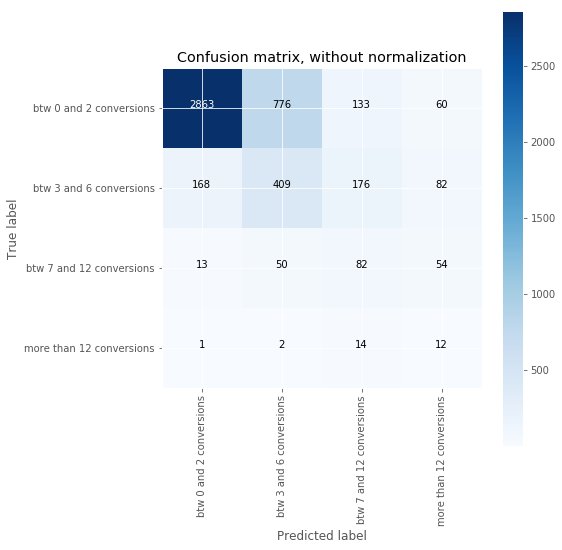

In [162]:
cnf_matrix = confusion_matrix(y_test, y_pred_softmax,labels=label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label,
                      title='Confusion matrix, without normalization')

In [163]:
clf = RandomForestClassifier(n_estimators = 50, max_leaf_nodes = 16 , n_jobs =-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20,40,50]
}

scorers = {
    'precision_score': make_scorer(precision_score,average='micro'),
    'recall_score': make_scorer(recall_score,average='micro')
}

In [164]:
refit_score='precision_score'
    #"""
    #fits a GridSearchCV classifier using refit_score for optimization
    #prints classifier performance metrics
    #"""
skf = StratifiedKFold(n_splits=10)
grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
grid_search.fit(train_X, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=16,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fract...
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 5, 15, 25],
                         'max_features': [3, 5, 10, 20, 40, 50],
                         'min_samples_split': [3, 5, 10],
                         

In [165]:
    # make the predictions
y_pred = grid_search.predict(test_X)
y_preda = grid_search.predict(testa_X)

print('Best params for {}'.format(refit_score))
print(grid_search.best_params_)

    # confusion matrix on the test data.
print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))

Best params for precision_score
{'max_depth': 15, 'max_features': 50, 'min_samples_split': 5, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for precision_score on the test data:


In [166]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn import linear_model


### What is the difference between the Lg_mult and softmax_reg? OR picking solver as lbfgs and newton-cg?

In sklearn explanation, it suggests that lbfgs is recommended for small data-sets and newton-cg for . Both supports L2 regularization.

>**Newton’s Method**: *Recall the motivation for gradient descent step at x: we minimize the quadratic function (i.e. Cost Function).
Newton’s method uses in a sense a better quadratic function minimisation. A better because it uses the quadratic approximation (i.e. first AND second partial derivatives).
You can imagine it as a twisted Gradient Descent with The Hessian (The Hessian is a square matrix of second-order partial derivatives of order nxn).
Moreover, the geometric interpretation of Newton's method is that at each iteration one approximates  f(x) by a quadratic function around xn, and then takes a step towards the maximum/minimum of that quadratic function (in higher dimensions, this may also be a saddle point). Note that if f(x) happens to be a quadratic function, then the exact extremum is found in one step.*

> Drawbacks:
It’s computationally expensive because of The Hessian Matrix (i.e. second partial derivatives calculations).
It attracts to Saddle Points which are common in multivariable optimization (i.e. a point its partial derivatives disagree over whether this input should be a maximum or a minimum point!).

>**Limited-memory Broyden-Fletcher-Goldfarb-Shanno Algorithm:** *In a nutshell, it is analogue of the Newton’s Method but here the Hessian matrix is approximated using updates specified by gradient evaluations (or approximate gradient evaluations). In other words, using an estimation to the inverse Hessian matrix. 
The term Limited-memory simply means it stores only a few vectors that represent the approximation implicitly. 
If I dare say that when dataset is small, L-BFGS relatively performs the best compared to other methods especially it saves a lot of memory, however there are some “serious” drawbacks such that if it is unsafeguarded, it may not converge to anything.*

- [https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- [https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

### There are other solvers that are compatible with multinomial and L2 regularization: sag and saga. Why did we just used two of the solver? These two are faster on large datasets. (We don't need to  run the model fast but it will be bigger at some point.)

In [167]:
clf_lg_mult = LogisticRegression(multi_class = 'multinomial',class_weight='balanced',
                              C=10, solver = 'newton-cg').fit(train_X, y_train)
clf_rf_enpy = RandomForestClassifier(criterion='entropy',max_depth=15, 
                                 max_features=40,min_samples_split=10, 
                                 n_estimators=100).fit(train_X, y_train)
clf_rf_gini = RandomForestClassifier(criterion='gini',max_depth=15, 
                                 max_features=40,min_samples_split=10, 
                                 n_estimators=100).fit(train_X, y_train)


In [168]:
# Copy pasted here for comparison purposes. Do not uncomment since it has already run before!

# softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs" ,penalty='l2',tol=1e-16,
#                                 class_weight='balanced', C = 10,max_iter=10000 ) 

# clf_lg_mult = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',class_weight='balanced',
#                               C=10)

In [169]:
y_pred_rf_enpy= clf_rf_enpy.predict(test_X)
probs_rf_enpy=clf_rf_enpy.predict_proba(test_X)
y_pred_clf_gini= clf_rf_gini.predict(test_X) 
probs_rf_gini=clf_rf_gini.predict_proba(test_X)
y_pred_lg_mult= clf_lg_mult.predict(test_X)
probs_lg_mult=clf_lg_mult.predict_proba(test_X)

In [170]:
y_preda_rf_enpy= clf_rf_enpy.predict(testa_X)
probsa_rf_enpy=clf_rf_enpy.predict_proba(testa_X)
y_preda_clf_gini= clf_rf_gini.predict(testa_X)
probsa_rf_gini=clf_rf_gini.predict_proba(testa_X)
y_preda_lg_mult= clf_lg_mult.predict(testa_X)
probsa_lg_mult=clf_lg_mult.predict_proba(testa_X)

Confusion matrix, without normalization
[[3652  176    4    0]
 [ 527  275   32    1]
 [  53  110   35    1]
 [   2   16    9    2]]


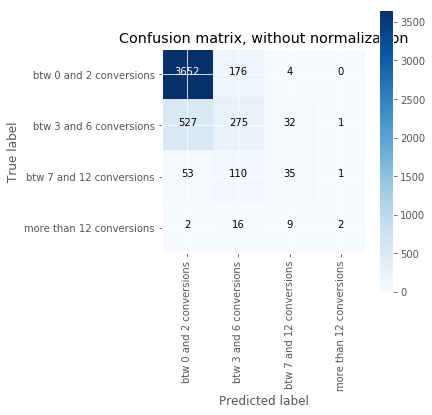

In [171]:
cnf_matrix = confusion_matrix(y_test, y_pred_clf_gini,labels=label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=label,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[3652  174    6    0]
 [ 518  285   31    1]
 [  58  103   36    2]
 [   2   16    8    3]]


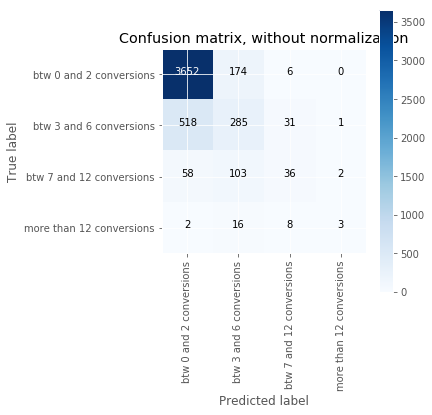

In [172]:
cnf_matrix = confusion_matrix(y_test, y_pred_rf_enpy,labels=label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=label,
                      title='Confusion matrix, without normalization')

In [173]:
y_test_df=pd.DataFrame(y_test)


In [174]:
y_test.head()

63966    btw 0 and 2 conversions
64722    btw 3 and 6 conversions
61359    btw 0 and 2 conversions
72877    btw 0 and 2 conversions
62935    btw 3 and 6 conversions
Name: labels, dtype: object

In [175]:
my_list_mult=np.round(np.array(probs_lg_mult),2).tolist()

In [176]:
my_lista_mult=np.round(np.array(probsa_lg_mult),2).tolist()

In [177]:
my_list_gini=np.round(np.array(probs_rf_gini),2).tolist()
y_test_df['pred_rf_gini']=y_pred_clf_gini
y_test_df['probs_rf_gini']=my_list_gini

In [178]:
my_lista_gini=np.round(np.array(probsa_rf_gini),2).tolist()
y_testa_df = pd.DataFrame(y_preda_clf_gini, columns = ['pred_rf_gini'])
y_testa_df['probs_rf_gini']=my_lista_gini

In [179]:
my_list_enpy=np.round(np.array(probs_rf_enpy),2).tolist()
y_test_df['pred_rf_enpy']=y_pred_rf_enpy
y_test_df['probs_rf_enpy']=my_list_enpy

In [180]:
my_lista_enpy=np.round(np.array(probsa_rf_enpy),2).tolist()
y_testa_df['pred_rf_enpy']=y_preda_rf_enpy
y_testa_df['probs_rf_enpy']=my_lista_enpy

In [181]:

y_test_df['pred_lg_mult']=y_pred_lg_mult
y_test_df['probs_lg_mult']=my_list_mult

In [182]:

y_testa_df['pred_lg_mult']=y_preda_lg_mult
y_testa_df['probs_lg_mult']=my_lista_mult

In [183]:
y_pred_softmax = softmax_reg.predict(test_X) 
probs_softmax = softmax_reg.predict_proba(test_X) 
my_list_softmax=np.round(np.array(probs_softmax),2).tolist()

y_test_df['pred_softmax']=y_pred_softmax
y_test_df['probs_lg_softmax']=my_list_softmax


In [184]:
y_preda_softmax = softmax_reg.predict(testa_X) 
probsa_softmax = softmax_reg.predict_proba(testa_X) 
my_lista_softmax=np.round(np.array(probsa_softmax),2).tolist()

y_testa_df['pred_softmax']=y_preda_softmax
y_testa_df['probs_lg_softmax']=my_lista_softmax


In [185]:
y_test_df.head(2)

,labels,pred_rf_gini,probs_rf_gini,pred_rf_enpy,probs_rf_enpy,pred_lg_mult,probs_lg_mult,pred_softmax,probs_lg_softmax
63966,btw 0 and 2 conversions,btw 0 and 2 conversions,"[0.99, 0.01, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[0.95, 0.04, 0.01, 0.0]",btw 0 and 2 conversions,"[0.95, 0.04, 0.01, 0.0]"
64722,btw 3 and 6 conversions,btw 0 and 2 conversions,"[0.45, 0.41, 0.13, 0.01]",btw 0 and 2 conversions,"[0.43, 0.38, 0.17, 0.01]",btw 3 and 6 conversions,"[0.13, 0.56, 0.3, 0.0]",btw 3 and 6 conversions,"[0.13, 0.56, 0.3, 0.0]"


In [186]:
y_testa_df.head(2)

,pred_rf_gini,probs_rf_gini,pred_rf_enpy,probs_rf_enpy,pred_lg_mult,probs_lg_mult,pred_softmax,probs_lg_softmax
0,btw 0 and 2 conversions,"[0.99, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]"
1,btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]"


In [187]:
X_testa.reset_index(drop = True, inplace = True)

In [188]:
df_test = pd.merge(X_test,y_test_df,how = 'left',left_index = True, right_index = True)

In [189]:
df_testa = pd.merge(X_testa.reset_index(drop = True),y_testa_df,how = 'left',left_index = True, right_index = True)

In [190]:
X_testa.shape

(10852, 9)

In [191]:
y_testa_df.shape

(10852, 8)

In [192]:
df_testa.shape

(10852, 17)

In [193]:
y_testa_df.isnull().sum()

pred_rf_gini        0
probs_rf_gini       0
pred_rf_enpy        0
probs_rf_enpy       0
pred_lg_mult        0
probs_lg_mult       0
pred_softmax        0
probs_lg_softmax    0
dtype: int64

In [194]:
df_testa.isnull().sum()

year                0
month               0
week_num            0
day_of_week         0
age                 0
topic               0
target_grouped      0
location            0
amount_spent_usd    0
pred_rf_gini        0
probs_rf_gini       0
pred_rf_enpy        0
probs_rf_enpy       0
pred_lg_mult        0
probs_lg_mult       0
pred_softmax        0
probs_lg_softmax    0
dtype: int64

In [195]:
df_test.head()

,year,month,week_num,day_of_week,age,topic,target_grouped,location,amount_spent_usd,labels,pred_rf_gini,probs_rf_gini,pred_rf_enpy,probs_rf_enpy,pred_lg_mult,probs_lg_mult,pred_softmax,probs_lg_softmax
63966,2019,6,26,Thurs,45-54,PS,websiteremarketinglal,US,0.340000,btw 0 and 2 conversions,btw 0 and 2 conversions,"[0.99, 0.01, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[0.95, 0.04, 0.01, 0.0]",btw 0 and 2 conversions,"[0.95, 0.04, 0.01, 0.0]"
64722,2019,1,4,Tues,35-44,PS,googlestreetviewphotographers,US,134.480000,btw 3 and 6 conversions,btw 0 and 2 conversions,"[0.45, 0.41, 0.13, 0.01]",btw 0 and 2 conversions,"[0.43, 0.38, 0.17, 0.01]",btw 3 and 6 conversions,"[0.13, 0.56, 0.3, 0.0]",btw 3 and 6 conversions,"[0.13, 0.56, 0.3, 0.0]"
61359,2018,11,45,Sat,18-24,PS,openedleadformlal,US,8.189683,btw 0 and 2 conversions,btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[0.83, 0.16, 0.0, 0.0]",btw 0 and 2 conversions,"[0.83, 0.16, 0.0, 0.0]"
72877,2018,9,38,Sun,35-44,RRE,openedleadformlal,US,54.430000,btw 0 and 2 conversions,btw 0 and 2 conversions,"[0.87, 0.12, 0.0, 0.0]",btw 0 and 2 conversions,"[0.88, 0.12, 0.0, 0.0]",btw 0 and 2 conversions,"[0.56, 0.44, 0.0, 0.0]",btw 0 and 2 conversions,"[0.56, 0.44, 0.0, 0.0]"
62935,2019,7,28,Sun,35-44,PS,infographic,US,296.530000,btw 3 and 6 conversions,btw 3 and 6 conversions,"[0.17, 0.6, 0.2, 0.02]",btw 3 and 6 conversions,"[0.18, 0.58, 0.22, 0.02]",btw 7 and 12 conversions,"[0.0, 0.07, 0.93, 0.0]",btw 7 and 12 conversions,"[0.0, 0.07, 0.93, 0.0]"


In [196]:
df_testa.head()

,year,month,week_num,day_of_week,age,topic,target_grouped,location,amount_spent_usd,pred_rf_gini,probs_rf_gini,pred_rf_enpy,probs_rf_enpy,pred_lg_mult,probs_lg_mult,pred_softmax,probs_lg_softmax
0,2019,8,31,Thurs,18-24,RRE,evergreen,US,10,btw 0 and 2 conversions,"[0.99, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]"
1,2019,8,31,Thurs,18-24,RRE,sqllal,US,10,btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]"
2,2019,8,31,Thurs,18-24,RRE,pagevisitorremarketing,US,10,btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]"
3,2019,8,31,Thurs,18-24,PS,evergreen,US,10,btw 0 and 2 conversions,"[0.99, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[0.99, 0.0, 0.01, 0.0]",btw 0 and 2 conversions,"[0.99, 0.01, 0.0, 0.0]",btw 0 and 2 conversions,"[0.99, 0.01, 0.0, 0.0]"
4,2019,8,31,Thurs,18-24,PS,entphotographyentrepreneur,US,10,btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[1.0, 0.0, 0.0, 0.0]",btw 0 and 2 conversions,"[0.99, 0.01, 0.0, 0.0]",btw 0 and 2 conversions,"[0.99, 0.01, 0.0, 0.0]"


In [197]:
df_testa.isnull().sum()

year                0
month               0
week_num            0
day_of_week         0
age                 0
topic               0
target_grouped      0
location            0
amount_spent_usd    0
pred_rf_gini        0
probs_rf_gini       0
pred_rf_enpy        0
probs_rf_enpy       0
pred_lg_mult        0
probs_lg_mult       0
pred_softmax        0
probs_lg_softmax    0
dtype: int64

In [198]:
print("actual: " + str(df_test.iloc[0:1, 7:8]))
print("probability rf_gini: " + str(sorted(zip(clf_rf_gini.classes_, probs_rf_gini[0] ), key=lambda x:x[1] )[-2:]))
print("probability rf_enpy: " + str(sorted(zip(clf_rf_enpy.classes_, probs_rf_enpy[0] ), key=lambda x:x[1] )[-2:]))
print("probability lg_mult: " + str(sorted(zip(clf_lg_mult.classes_, probs_lg_mult[0] ), key=lambda x:x[1] )[-2:]))



actual:       location
63966       US
probability rf_gini: [('btw 3 and 6 conversions', 0.014905284307197295), ('btw 0 and 2 conversions', 0.9850575875556643)]
probability rf_enpy: [('btw 3 and 6 conversions', 0.001), ('btw 0 and 2 conversions', 0.9990000000000001)]
probability lg_mult: [('btw 3 and 6 conversions', 0.04217412389223237), ('btw 0 and 2 conversions', 0.9489552958903287)]


### Why assigning different weights to knn, dt and SVC in votingclassifier()? Because knn is lazy and has a low performance?

In [199]:
print(__doc__)

from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.01, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(train_X, y_train)
clf2.fit(train_X, y_train)
clf3.fit(train_X, y_train)
eclf.fit(train_X, y_train)


Automatically created module for IPython interactive environment


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     criterion='gini',
                                                     max_depth=5,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter='best')),
   

In [200]:
cross_val_score(eclf,train_X, y_train, cv=10, scoring="accuracy")

array([0.79, 0.8 , 0.81, 0.8 , 0.79, 0.81, 0.82, 0.81, 0.82, 0.81])

In [201]:
y_pred_clf1 = clf1.predict(test_X) 
y_pred_clf2 = clf2.predict(test_X)
y_pred_clf3 = clf3.predict(test_X)
y_pred_voter=eclf.predict(test_X)

In [219]:
select_ind = np.array(list(range(0,100)))
testa_X.tocsr()[select_ind,:]

<100x112 sparse matrix of type '<class 'numpy.float64'>'
	with 900 stored elements in Compressed Sparse Row format>

In [209]:
y_preda_clf1 = clf1.predict(testa_X)
y_preda_clf2 = clf2.predict(testa_X)
y_preda_clf3 = clf3.predict(testa_X)
y_preda_voter=eclf.predict(testa_X)

In [1]:
prb_voter_clf=eclf.predict_proba(test_X)
my_list_voter=np.round(np.array(prb_voter_clf),2).tolist()

NameError: name 'eclf' is not defined

In [ ]:
prba_voter_clf=eclf.predict_proba(testa_X)
my_lista_voter=np.round(np.array(prba_voter_clf),2).tolist()

In [ ]:
df_test['pred_voter']=y_pred_voter
df_test['prop_voter']=my_list_voter

In [ ]:
df_testa['pred_voter']=y_preda_voter
df_testa['prop_voter']=my_lista_voter

In [ ]:
df_test.head()

In [ ]:
df_testa.head()

In [ ]:
cross_val_score(clf_rf_gini,train_X, y_train, cv=10, scoring="accuracy")

In [ ]:
cross_val_score(clf_rf_enpy,train_X, y_train, cv=10, scoring="accuracy")

In [ ]:
cnf_matrix_gini = confusion_matrix(y_test,y_pred_voter,labels=label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix_gini, classes=label,
                      title='Confusion matrix, without normalization')

In [ ]:
#rf_err_df=df_test[df_test['labels']!=df_test['rf_pred']].iloc[0:30,0:12].head(30)

In [ ]:
unique_val_count(df_test.target_grouped)

In [ ]:
df_test.head(15)

In [ ]:
df_test["month"] = pd.to_numeric(df_test["month"])

In [ ]:
df_testa["month"] = pd.to_numeric(df_testa["month"])

In [ ]:
df_test_entph=df_test[df_test['target_grouped']=='entphotographyentrepreneur']

In [ ]:
ax_low_ent= df_test_entph[(df_test_entph['pred_rf_gini']=="btw 0 and 2 conversions")|
             (df_test_entph['pred_rf_gini']=="btw 3 and 6 conversions")].groupby(['pred_rf_gini',
                                                                                'month','year'])['pred_rf_gini'].count().unstack(0).sort_values(by=['year',
             'month'],ascending=[True,True]).plot.bar(title="Number monthly frequencies",
                                                                           figsize=(18,5),
                                                                           color=['salmon','navy','cyan','yellow']
                                                                           ,width = 0.90)

In [ ]:
np.unique(df_test.labels)

In [ ]:
df_test.head(2)

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

#df_test['new'] = np.where(df_test.labels=='btw 0 and 2 conversions', 'low',
                          # np.where(df_test.labels=='more 3 than 6 conversions', 'low','high'))

In [ ]:
#df_test=df_test.drop('new',axis=1)

Below code generated an error saying that 'seaborn doesn't have a function called catplot.' That's why I picked countplot with the same purpose.

In [ ]:
# orders=label
# sns.set_style("whitegrid")
# sns.set(font_scale=1)
# p=sns.catplot(x="labels",hue="labels", kind="count",order=orders,height=8,aspect=1,col='year', data=df_test)



In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x=df_test['year'], hue = df_test['labels'], 
                    data = df_test, )

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier( splitter = "random" ,class_weight='balanced', max_leaf_nodes = 5, min_samples_split=10 ), 
                            n_estimators =100 , max_samples = 0.5 , bootstrap = True , n_jobs =-1 ) 

In [ ]:
bag_clf.fit(train_X,y_train)

In [ ]:
cross_val_score(bag_clf,train_X, y_train, cv=10, scoring="accuracy")

In [ ]:
X_train.shape[0]

In [ ]:
smote=SMOTE('minority')

In [ ]:
X_sm_logr,y_sm_logr=smote.fit_sample(train_X,y_train)

In [ ]:
logr_sm=softmax_reg.fit(X_sm_logr,y_sm_logr)

In [ ]:
softmax_pred_sm=logr_sm.predict(test_X) 


In [ ]:
softmax_preda_sm=logr_sm.predict(testa_X) 


In [ ]:
cnf_matrix = confusion_matrix(y_test,softmax_pred_sm,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
cross_val_score(logr_sm,X_sm_logr, y_sm_logr, cv=10, scoring="accuracy",)

In [ ]:
print (metrics.classification_report(y_test,softmax_pred_sm, target_names=df_test['labels'].unique()))

In [ ]:
#lsvc

lsvc = LinearSVC(C=0.9, penalty="l1", dual=False, multi_class='ovr',class_weight='balanced').fit(train_X, y_train)
model = SelectFromModel(lsvc, prefit=True)

In [ ]:
y_pred_lsvc= lsvc.predict(test_X) 

In [ ]:
y_preda_lsvc= lsvc.predict(testa_X) 

In [ ]:
#df_test['pred_lsvc']=y_pred_lsvc

In [ ]:
#df_test=df_test.drop('pred_lsvc',axis=1)

In [ ]:
cross_val_score(lsvc,train_X, y_train, cv=10, scoring="accuracy",)

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred_lsvc,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
print(metrics.classification_report(y_test, y_pred_lsvc, target_names=df_test['labels'].unique()))

In [ ]:
y_pred_bag= bag_clf.predict(test_X) 

In [ ]:
y_preda_bag= bag_clf.predict(testa_X) 

In [ ]:
prb_bag_clf=bag_clf.predict_proba(test_X)
my_list_bag=np.round(np.array(prb_bag_clf),2).tolist()

In [ ]:
prba_bag_clf=bag_clf.predict_proba(testa_X)
my_lista_bag=np.round(np.array(prba_bag_clf),2).tolist()

In [ ]:
df_test['pred_bag']=y_pred_bag

In [ ]:
df_testa['pred_bag']=y_preda_bag

In [ ]:
df_test['prb_bag_clf']=my_list_bag

In [ ]:
df_testa['prb_bag_clf']=my_lista_bag

In [ ]:
df_test.isnull().sum()

In [ ]:
df_testa.isnull().sum()

In [ ]:
df_test.columns

In [ ]:
df_test.head(10)

In [ ]:
#print(metrics.classification_report(y_test, y_pred_bag, target_names=df['labels'].unique()))

In [ ]:
#print(metrics.classification_report(y_test, y_pred_clf1, target_names=df['labels'].unique()))

In [ ]:
#print(metrics.classification_report(y_test, y_pred_clf2, target_names=df['labels'].unique()))

In [ ]:
#print(metrics.classification_report(y_test, y_pred_clf3, target_names=df['labels'].unique()))

In [ ]:
#print(metrics.classification_report(y_test, y_pred_voter, target_names=df['labels'].unique()))

In [ ]:
tree_reg=DecisionTreeClassifier(class_weight='balanced',max_depth=3,criterion='gini',min_samples_leaf=10)
tree_reg.fit(train_X,y_train)

In [ ]:
y_pred_tree=tree_reg.predict(test_X)
prb_tree_reg=tree_reg.predict_proba(test_X)
my_list_tree=np.round(np.array(prb_tree_reg),2).tolist()


In [ ]:
y_preda_tree=tree_reg.predict(testa_X)
prba_tree_reg=tree_reg.predict_proba(testa_X)
my_lista_tree=np.round(np.array(prba_tree_reg),2).tolist()


In [ ]:
df_test['pred_reg_tree']=y_pred_tree
df_test['probs_reg_tree']=my_list_tree

In [ ]:
df_testa['pred_reg_tree']=y_preda_tree
df_testa['probs_reg_tree']=my_lista_tree

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_tree,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
!pip install xgboost

In [ ]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

In [ ]:
# grid search
model_xgb = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model_xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(train_X,y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

In [ ]:
# XGBoost, Tune n_estimators and max_depth
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

In [ ]:
model_xgb = XGBClassifier()
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model_xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(train_X, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_max_depth.png')

In [ ]:
model_xgb_tn = XGBClassifier(n_estimators=150,max_depth=4,objective='multi:softprob')
model_xgb_tn.fit(train_X,y_train)

In [ ]:
y_pred_xgb=model_xgb_tn.predict(test_X)

In [ ]:
y_preda_xgb=model_xgb_tn.predict(testa_X)

In [ ]:
np.set_printoptions(precision=3,suppress=True)
prb_xgb_clf=model_xgb_tn.predict_proba(test_X)
my_list_xgb=np.round(np.array(prb_xgb_clf),2).tolist()

In [ ]:
np.set_printoptions(precision=3,suppress=True)
prba_xgb_clf=model_xgb_tn.predict_proba(testa_X)
my_lista_xgb=np.round(np.array(prba_xgb_clf),2).tolist()

In [ ]:
df_test['pred_xgb']=y_pred_xgb
df_test['xgb_prob']=my_list_xgb


In [ ]:
df_testa['pred_xgb']=y_preda_xgb
df_testa['xgb_prob']=my_lista_xgb


In [ ]:
print(metrics.classification_report(y_test, y_pred_xgb, target_names=df_test['labels'].unique()))

In [ ]:
df_test.head(20)

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_xgb,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
fb.columns

In [ ]:
# Create adaboost classifer object
abc_discrete =AdaBoostClassifier(n_estimators=100, base_estimator=clf_rf_gini,learning_rate=0.001,
    algorithm="SAMME")

abc_real =AdaBoostClassifier(n_estimators=100, base_estimator=clf_rf_gini,learning_rate=0.001)

In [ ]:
# Train Adaboost Classifer
abc_discrete.fit(train_X, y_train)
abc_real.fit(train_X, y_train)

In [ ]:
#Predict the response for test dataset
y_pred_abc_disc = abc_discrete.predict(test_X)
y_pred_abc_real = abc_real.predict(test_X)




# Model Accuracy, how often is the classifier correct?
print("Accuracy abc SAMME:",metrics.accuracy_score(y_test, y_pred_abc_disc))
print("Accuracy abc:",metrics.accuracy_score(y_test, y_pred_abc_real))

In [ ]:
#Predict the response for test dataset
y_preda_abc_disc = abc_discrete.predict(testa_X)
y_preda_abc_real = abc_real.predict(testa_X)




# Model Accuracy, how often is the classifier correct?
print("Accuracy abc SAMME:",metrics.accuracy_score(y_test, y_pred_abc_disc))
print("Accuracy abc:",metrics.accuracy_score(y_test, y_pred_abc_real))

In [ ]:
print(metrics.classification_report(y_test, y_pred_abc_real, target_names=fb['labels'].unique()))

In [ ]:
print(metrics.classification_report(y_test, y_pred_abc_disc, target_names=fb['labels'].unique()))

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_abc_disc,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_abc_real,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
prb_abc_disc=abc_discrete.predict_proba(test_X)
my_list_abc_disc=np.round(np.array(prb_abc_disc),2).tolist()

In [ ]:
prba_abc_disc=abc_discrete.predict_proba(testa_X)
my_lista_abc_disc=np.round(np.array(prba_abc_disc),2).tolist()

In [ ]:
df_test['pred_abc_disc']=y_pred_abc_disc
df_test['probs_abc_disc']=my_list_abc_disc

In [ ]:
df_testa['pred_abc_disc']=y_preda_abc_disc
df_testa['probs_abc_disc']=my_lista_abc_disc

In [ ]:
prb_abc_real=abc_real.predict_proba(test_X)
my_list_abc_real=np.round(np.array(prb_abc_real),2).tolist()

In [ ]:
prba_abc_real=abc_real.predict_proba(testa_X)
my_lista_abc_real=np.round(np.array(prba_abc_real),2).tolist()

In [ ]:
df_test['pred_abc_real']=y_pred_abc_real
df_test['probs_abc_real']=my_list_abc_real


In [ ]:
df_testa['pred_abc_real']=y_preda_abc_real
df_testa['probs_abc_real']=my_lista_abc_real


In [ ]:
df_test.shape

In [ ]:
df_testa.shape

In [ ]:
#np.unique(df_test['topic'].values.tolist())

In [ ]:
df_test[df_test['year']==2019].sort_values(by='amount_spent_usd',ascending=False).head(20)

In [ ]:
df_test[df_test['labels']=='btw 7 and 12 conversions'].head(10)

In [ ]:
# How many observations there are per week in June 2019
june_pred = pd.DataFrame(df_test[(df_test['year'] == 2019) & (df_test['month'] == 6)]['week_num'].value_counts()).reset_index()
june_pred.columns = ['week_num', 'count']
june_pred.sort_values(by = ['week_num'], inplace = True)
june_pred

In [ ]:
# How many observations there are per week in July 2019
july_pred = pd.DataFrame(df_test[(df_test['year'] == 2019) & (df_test['month'] == 7)]['week_num'].value_counts()).reset_index()
july_pred.columns = ['week_num', 'count']
july_pred.sort_values(by = ['week_num'], inplace = True)
july_pred

In [ ]:
df_testa = df_testa.rename(index=str, columns={'prop_voter':'props_voter',
                                    'prb_bag_clf':'probs_bag_clf',
                                    'xgb_prob':'probs_xgb'})

In [ ]:
df_testa.columns.tolist()

In [ ]:
prob_cols = [prob_col for prob_col in df_testa if prob_col.startswith('probs')]
df_probs = df_testa[prob_cols]
df_probs['probs_final'] = np.nan

In [ ]:
df_probs.columns.tolist()

In [ ]:
prob_lst = []
for i in range(len(df_probs)):
    total_1 = 0
    total_2 = 0
    total_3 = 0
    total_4 = 0
    
    for j in range(len(df_probs.columns)-1):
        total_1 = total_1 + df_probs.iloc[i,j][0]
        total_2 = total_2 + df_probs.iloc[i,j][1]
        total_3 = total_3 + df_probs.iloc[i,j][2]
        total_4 = total_4 + df_probs.iloc[i,j][3]
        
    num_col = (len(df_probs.columns.tolist()) - 1)
    all_probs = [total_1, total_2, total_3, total_4]
    prob_lst.append([k/num_col for k in all_probs])

In [ ]:
df_probs['probs_final'] = prob_lst

In [ ]:
df_probs['pred_final'] = 0

In [ ]:
df_testa['probs_final'] = prob_lst

In [ ]:
some_ser = []
for i in range(len(df_probs)):
    some_lst = df_probs['probs_final'][i]
    m = max(some_lst)
    ind_max = some_lst.index(max(some_lst))
    some_ser.append(ind_max)

In [ ]:
df_probs['pred_final'] = some_ser

In [ ]:
df_probs.pred_final.value_counts()

In [ ]:
df_probs.pred_final = df_probs.pred_final.astype(int)
df_probs['final_prediction'] = np.nan

In [ ]:
def label_converter(x):
    if x == 0:
        return 'btw 0 and 2 conversions'
    elif x == 1:
        return 'btw 3 and 6 conversions'
    elif x == 2:
        return 'btw 7 and 12 conversions'
    elif x == 3:
        return 'more than 12 conversions'
    else:
        return 'Error'

In [ ]:
df_probs['final_prediction'] = df_probs['pred_final'].apply(label_converter)

In [ ]:
df_probs.final_prediction.value_counts()

In [ ]:
df_probs

In [ ]:
df_predictionsa = pd.merge(df_testa,df_probs[['final_prediction']],how = 'left',left_index = True, right_index = True)

In [ ]:
# The below line can computed if the results needs to be printed but for now what we are curious
# about is the predictions for the first week of august, which is uploaded to S3 and SageMaker in the below cell:
# df_test.to_csv('/home/ec2-user/SageMaker/fb_conversion_predictions_2019-06-27/Data/predictions.csv',index=False)

In [ ]:
df_predictionsa = df_predictionsa[(df_predictionsa['year'] == 2019) & (df_predictionsa['month'] == 8)]
df_testa = df_testa[(df_testa['year'] == 2019) & (df_testa['month'] == 8)]

In [ ]:
len(df_testa)

In [ ]:
df_predictionsa.final_prediction.value_counts()

In [ ]:
df_predictionsa

In [ ]:
df_predictionsa.to_csv('/home/ec2-user/SageMaker/fb_conversion_predictions_2019-06-27/Data/predictions_aug.csv',index=False)

In [ ]:
# Saving the file to S3:
from io import StringIO
import boto3

bucket='facebookconversionrates' # bucket name
data_key = 'modelling/predictions_aug.csv' # name of the csv file that will be created
csv_buffer = StringIO()
df_predictionsa.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, data_key).put(Body=csv_buffer.getvalue())

Below code are WIP! They need adjustment to give a prediction result!

In [ ]:
encoder = LabelBinarizer()
Y = encoder.fit_transform(y_train)
Y_test = encoder.fit_transform(y_test)

In [ ]:
y_train.shape

In [ ]:
Y.shape[0]

In [ ]:
train_X.shape

In [ ]:
def create_network():
    model = Sequential()
    model.add(Dense(40, input_shape=(111,), activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(4, activation='softmax'))
        
    #stochastic gradient descent
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [ ]:
neural_network = create_network()
neural_network.fit(train_X,Y, epochs=60, batch_size=10)

In [ ]:
neural_network.save('neural_network.h5')


In [ ]:
from keras.models import load_model
model_nn = load_model('neural_network.h5')

In [ ]:
y_nn_pred=neural_network.predict(test_X, batch_size=8, verbose=0)

In [ ]:
neural_network.compute_output_shape

In [ ]:
y_nn_pred_lst=y_nn_pred.tolist()

In [ ]:
df_nn=pd.DataFrame({'0 to 2':y_nn_pred[:,0],'3 to 6':y_nn_pred[:,1],'7 to 12':y_nn_pred[:,2],'more than 12':y_nn_pred[:,3]})

In [ ]:
nn_df=pd.DataFrame(y_nn_pred_lst, columns =['0 to 2', '3 to 6', '7 to 12','more than 12'], dtype = float) 

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
nn_df.head(30)

In [ ]:
df_test['week_num']=df_test['week_num'].astype(str)

In [ ]:
df_test['year']=df_test['year'].astype(str)

In [ ]:
df_test['month']=df_test['month'].astype(str)

In [ ]:
df_test.info()

In [ ]:
year=['2019']
month=['5','6','7']

In [ ]:
df_rcnt=df_test.query('year in @year and month in @month')

In [ ]:
df_rcnt[(df_rcnt['amount_spent_(usd)']>100)][0:10]

In [ ]:
Y_test[0:3]

In [ ]:
# evaluate the model
_, train_acc = neural_network.evaluate(train_X, Y, verbose=0)
_, test_acc = neural_network.evaluate(test_X, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [ ]:
encoder = LabelBinarizer()
Y = encoder.fit_transform(y_train)
Y_test = encoder.fit_transform(y_test)

In [ ]:
lst=y_nn_pred[0:20]

In [ ]:
keys=fb['labels'].unique()
ls=[lst,Y_test]
def assign_label(keys,lst):
    new_lst=[]
    for k, l in [(keys,lst) for k in keys for l in lst]:
        for i in range(len(lst)):
            results=list(zip(k,lst[i]))
            new_lst.append(results)
    return new_lst[0:5]


In [ ]:
assign_label(keys,lst)

In [ ]:
np.unique(y_test.values)

In [ ]:
history = neural_network.fit(train_X, Y, validation_data=(test_X, Y_test), epochs=20, verbose=0, batch_size=5)

In [ ]:

# plot training history
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
#plt.figure(figsize=(15,28))
plt.legend()
plt.show()

In [ ]:
def fit_model(train_X, Y, test_X,Y_test, n_batch):
# define model
    model = Sequential()
    model.add(Dense(30, input_dim=111, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(20,  activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4, activation='softmax'))
# compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
    history = model.fit(train_X, Y, validation_data=(test_X,Y_test), epochs=40, verbose=0, batch_size=n_batch)
    _, train_acc = neural_network.evaluate(train_X, Y, verbose=0)
    _, test_acc = neural_network.evaluate(test_X, Y_test, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot learning curves
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='test')
    plt.title('batch='+str(n_batch), pad=-40)

In [ ]:
batch_sizes = [8,16]#32,64,128, 256, 450]
for i in range(len(batch_sizes)):
    # determine the plot number
    plot_no = 420 + (i+1)
    f = plt.figure(figsize=(10,10))
    f.add_subplot(plot_no)
    # fit model and plot learning curves for a batch size
    fit_model(train_X, Y, test_X, Y_test, batch_sizes[i])
# show learning curves

plt.legend()
plt.show()

In [ ]:
def make_classifier():
    # define model
    model = Sequential()
    model.add(Dense(10, input_dim=111, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(20, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4, activation='softmax'))
# compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
classifier = KerasClassifier(build_fn = make_classifier)
                             #,
                           # batch_size=10, 
                             #nb_epoch=100)
def gen_results(classifier,train_X,Y):
    batch_sizes = [10, 20]
    epochs = [10]
    
    param_grid = dict(batch_size=batch_sizes, epochs=epochs)
    for key, value in param_grid.items():
        for x in value:
            grid = GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=-1)
            grid_result = grid.fit(train_X, Y)
            return grid_result

In [ ]:
gen_results(classifier,train_X,Y)

In [ ]:
accuracies = cross_val_score(estimator = classifier,
                             X =train_X,
                             y = Y,
                             cv = 10,
                             n_jobs = -1)

In [ ]:
accuracies

In [ ]:
mean = accuracies.mean()

In [ ]:
variance = accuracies.var()

In [ ]:
mean